# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | upata
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | vilyuysk
Processing Record 7 of Set 1 | argo
Processing Record 8 of Set 1 | ola
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | ketchikan
Processing Record 13 of Set 1 | labrador city
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | vadso
Processing Record 19 of Set 1 | zhangye
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | papao
Processing Record 22 of Set 1 | arno
Processing Record 23 of Set 1 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
Date          537
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,17.36,79,79,3.44,US,1717980233
1,georgetown,5.4112,100.3354,26.96,88,40,2.57,MY,1717980040
2,upata,8.0086,-62.3989,23.36,94,100,1.63,VE,1717980233
3,bilibino,68.0546,166.4372,12.91,39,54,1.32,RU,1717980233
4,port-aux-francais,-49.3500,70.2167,3.08,87,100,17.36,TF,1717980234


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_jimmy.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_jimmy.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.36,79,79,3.44,US,1717980233
1,georgetown,5.4112,100.3354,26.96,88,40,2.57,MY,1717980040
2,upata,8.0086,-62.3989,23.36,94,100,1.63,VE,1717980233
3,bilibino,68.0546,166.4372,12.91,39,54,1.32,RU,1717980233
4,port-aux-francais,-49.3500,70.2167,3.08,87,100,17.36,TF,1717980234


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

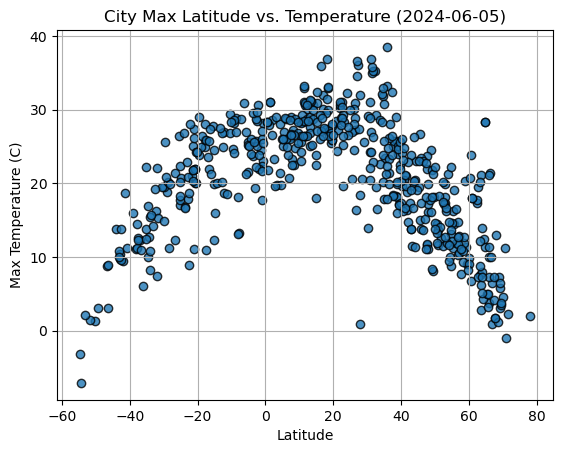

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.8, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-05)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig('output_data/Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

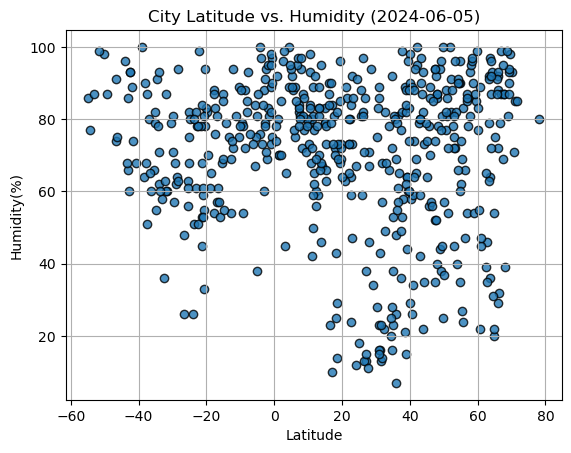

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.8, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-05)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

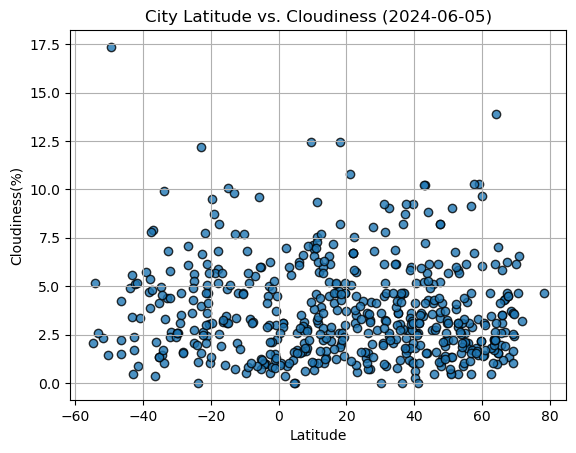

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.8, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-05)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

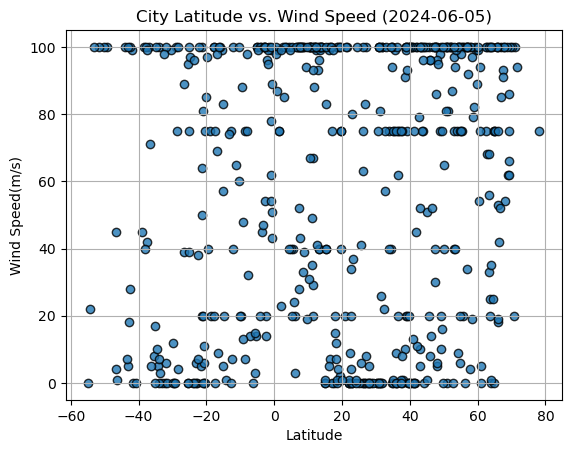

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = 0.8, marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-05)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linreg_plot(df, x_col, y_col, alpha = 1, marker='o', label = 'Linear Regression'):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = st.linregress(df[x_col], df[y_col])

    # Prediction Slope
    y_predict = slope * df[x_col] + intercept

    # Create plots
    plt.scatter(df[x_col], df[y_col], alpha = alpha, marker='o')
    plt.plot(df[x_col], y_predict, color = 'red', label = label)

    # Line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Annotate the line equation on the plot
    plt.annotate(line_eq, (df[x_col].max(), df[y_col].max()), fontsize = 15, color = "red")

    # Set x and y labels
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Print the r-value
    print(f"The r-value is: {r_value}")

    # Show Graph
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,17.36,79,79,3.44,US,1717980233
1,georgetown,5.4112,100.3354,26.96,88,40,2.57,MY,1717980040
2,upata,8.0086,-62.3989,23.36,94,100,1.63,VE,1717980233
3,bilibino,68.0546,166.4372,12.91,39,54,1.32,RU,1717980233
5,vilyuysk,63.7553,121.6247,21.11,36,25,2.24,RU,1717980234


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,3.08,87,100,17.36,TF,1717980234
8,adamstown,-25.0660,-130.1015,22.31,75,100,5.65,PN,1717980235
9,grytviken,-54.2811,-36.5092,-7.11,77,22,5.18,GS,1717980235
19,waitangi,-43.9535,-176.5597,13.79,96,100,4.92,NZ,1717980237
20,papao,-17.7500,-149.5500,25.82,88,100,5.88,PF,1717980238


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7621788040842665


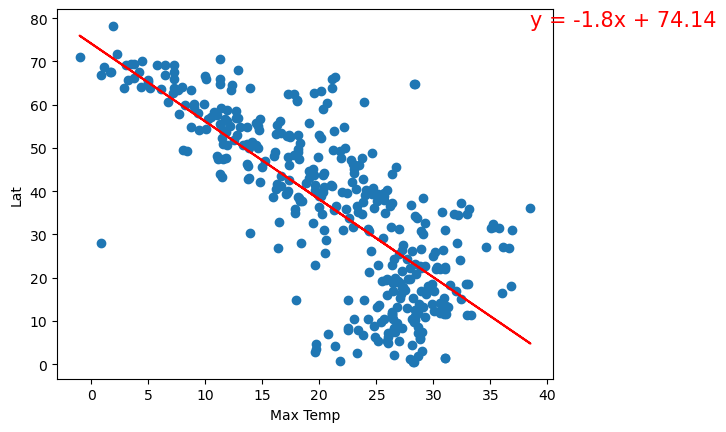

In [15]:
# Linear regression on Northern Hemisphere
create_linreg_plot(northern_hemi_df, 'Max Temp', 'Lat')


The r-value is: 0.780510606286296


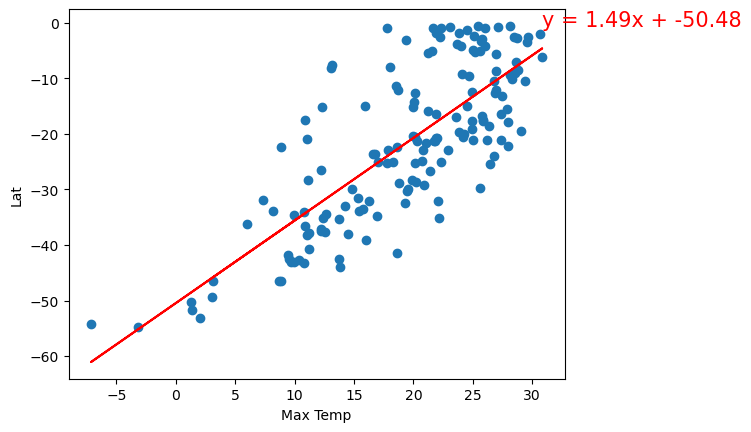

In [16]:
# Linear regression on Southern Hemisphere
create_linreg_plot(southern_hemi_df, 'Max Temp', 'Lat')


**Discussion about the linear relationship:** These relationships suggest that temperatures are highest near the equator (latitude 0) and decrease as we move towards the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.005177323212707627


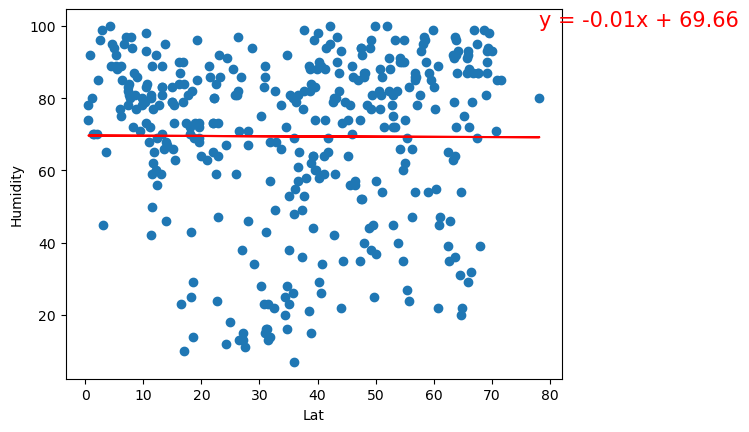

In [17]:
# Northern Hemisphere
create_linreg_plot(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: 0.07593465311780004


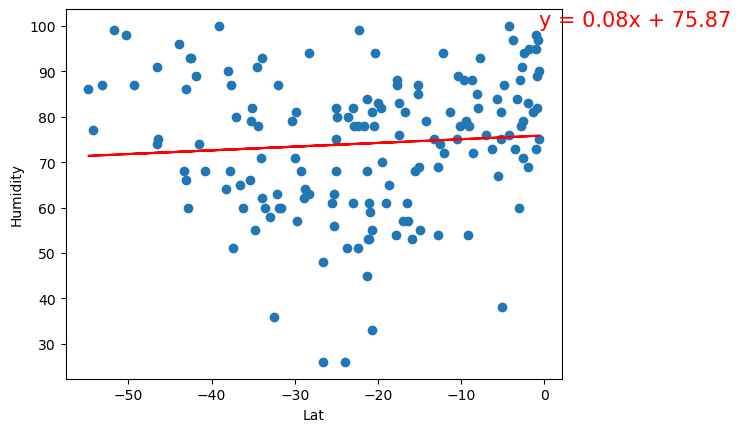

In [18]:
# Southern Hemisphere
create_linreg_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** These relationships suggest that in the Northern Hemisphere, there is a very slight increase in humidity as we move away from the equator, while in the Southern Hemisphere, there is a slight decrease in humidity as we move towards the equator. However, since the r values are so low, that this may not be correct relationship to draw it's conclusion.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06180636837127634


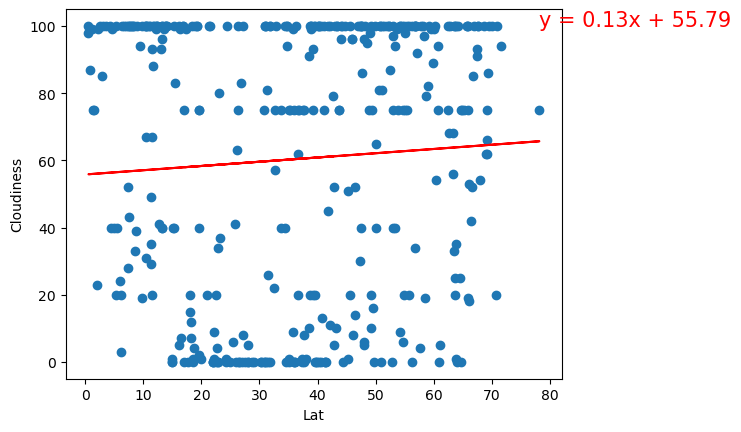

In [19]:
# Northern Hemisphere
create_linreg_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.15064070170672245


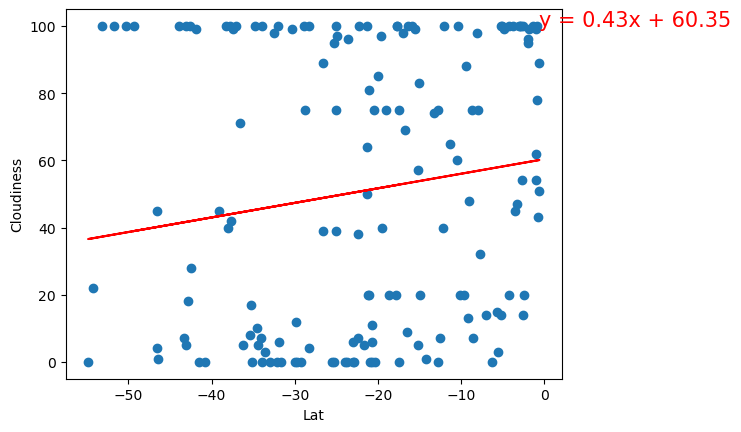

In [20]:
# Southern Hemisphere
create_linreg_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** These relationships suggest that in both the Northern and Southern Hemispheres, there is a slight decrease in cloudiness as we move towards the equator. However, like the one above the r-value is too low for us to use these two factors to draw it's conclusion/prediciton.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03940923271581104


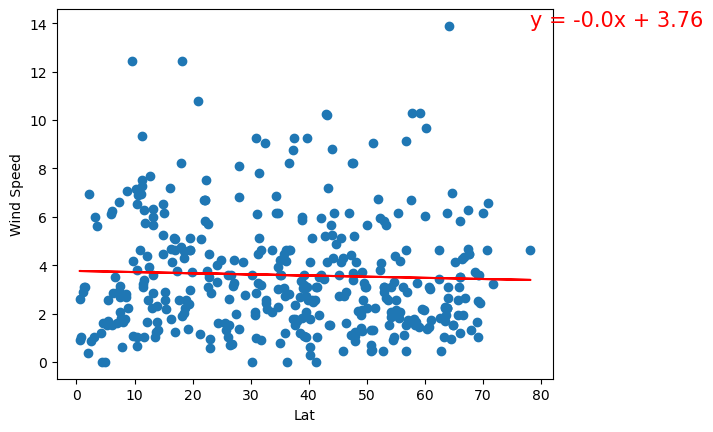

In [21]:
# Northern Hemisphere
create_linreg_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: -0.08881338889263192


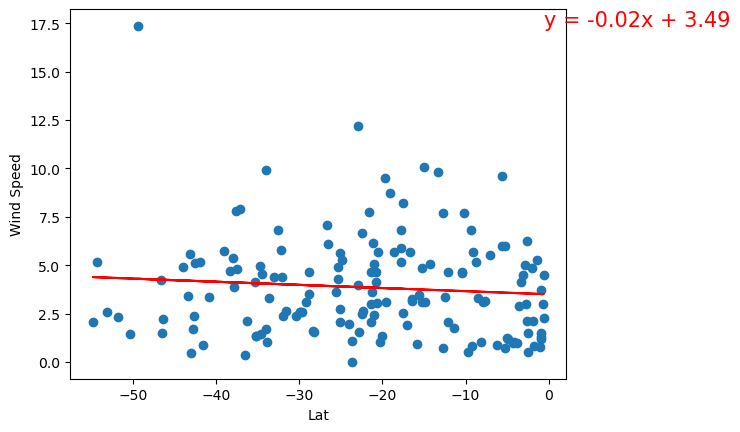

In [22]:
# Southern Hemisphere
create_linreg_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** These relationships suggest that in both the Northern and Southern Hemispheres, there is a slight decrease in wind speed as we move towards the equator. Samething as above, r-value is too low for the correlation.